In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import time
from tqdm import tqdm

from scripts.solvers.qkp_solver import *
from scripts.utils.kp_utils import *
from ADMM.scripts.solvers.classical_solver_UC import gurobi_knapsack_solver
from qiskit.primitives import StatevectorEstimator
from qiskit.quantum_info import Pauli
from qiskit.transpiler.passes.optimization.light_cone import LightCone
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler.passes.utils.remove_barriers import RemoveBarriers
from qiskit.transpiler import PassManager
from qiskit.converters import circuit_to_dag, dag_to_circuit
from qiskit.quantum_info import Operator
from qiskit.quantum_info import SparsePauliOp

In [12]:
import pickle

filename = "data_dict_150_simulator.pkl"  # replace with your actual filename

with open(filename, "rb") as f:
    data_dict_all = pickle.load(f)
data_dict = data_dict_all['data_dict']
annotations=data_dict_all['annotations']   
k=data_dict_all['k']
n=data_dict_all['n']
shots=data_dict_all['shots']
#print("Loaded data:", data_dict_loaded.keys())


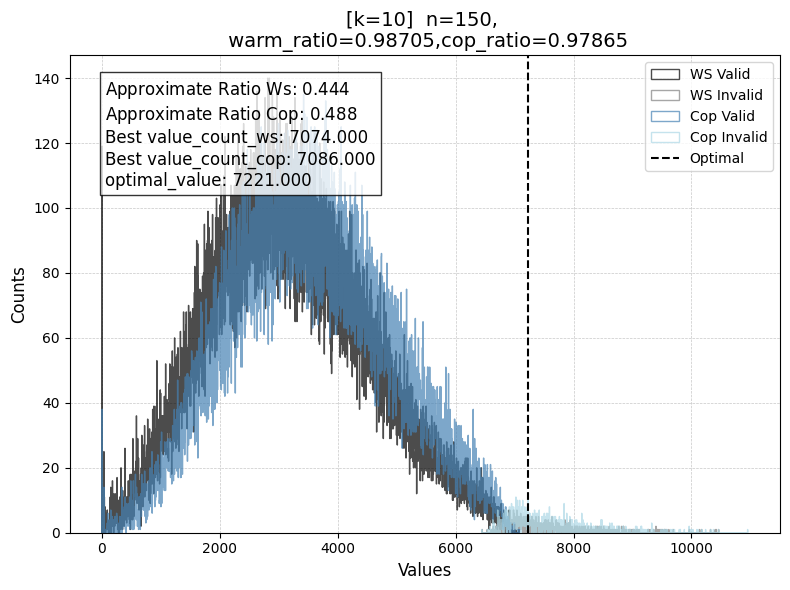

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': '[k=10]  n=150, \n warm_rati0=0.98705,cop_ratio=0.97865'}, xlabel='Values', ylabel='Counts'>)

In [13]:
from scripts.utils.visualize import plot_multiple_distributions


data_dict = {
    f"Random Valid": [],
    f"Random Invalid": [],
    f"WS Valid": data_dict['WS Valid'],
    f"WS Invalid": data_dict['WS Invalid'],
    f"Cop Valid": data_dict['Cop Valid'],
    f"Cop Invalid": data_dict['Cop Invalid'],
}

colors = {}
for label in data_dict.keys():
    if "Valid" in label:
        if "Random" in label:
            colors[label] = "orange"
        elif "WS" in label:
            colors[label] = "black"
        elif "Cop" in label:
            colors[label] = "steelblue"
    else:  # Invalid
        if "Random" in label:
            colors[label] = "lightsalmon"
        elif "WS" in label:
            colors[label] = "gray"
        elif "Cop" in label:
            colors[label] = "lightblue"
# Custom colors
# colors = {
#     f"Random_valid: Apr={approx_ratio_random:.2f}": "orange",
#     f"Random_invalid: Apr={approx_ratio_random:.2f}": "lightsalmon",
#     f"WS_valid: Apr={approx_ratio_ws:.3f}": 'black',
#     f"WS_invalid: Apr={approx_ratio_ws:.3f}": 'gray',
#     f"Cop_valid p=1: Apr={approx_ratio:.3f}": "steelblue",
#     f"Cop_invalid p=1: Apr={approx_ratio:.3f}": "lightblue",
# }
# Annotations
annotations = {
    r"$\mathrm{Approximate\ Ratio\ Ws}$": annotations['$\mathrm{Approximate\ Ratio\ Ws}$'],
    r"$\mathrm{Approximate\ Ratio\ Cop}$":  annotations['$\mathrm{Approximate\ Ratio\ Cop}$'],
    "Best value_count_ws": annotations['Best value_count_ws'],
    "Best value_count_cop": annotations['Best value_count_cop'],
    "optimal_value": annotations['optimal_value'],
}


plot_multiple_distributions(
    data_dict=data_dict,
    min_cost=annotations['optimal_value'],
    colors=colors,
    nb_bins=2000,
    log=False,
    annotations=annotations,
    figsize=(8, 6),
    title=f"[k={k}]  n={n}, \n warm_rati0={sum(data_dict['WS Valid'].values())/shots},cop_ratio={sum(data_dict['Cop Valid'].values())/shots}",
    )



In [34]:
import pickle

filename = "data_dict_150_QCTRL.pkl"  # replace with your actual filename

with open(filename, "rb") as f:
    data_dict_all = pickle.load(f)
data_dict = data_dict_all['data_dict']
annotations=data_dict_all['annotations']   
k=data_dict_all['k']
n=data_dict_all['n']
shots=data_dict_all['shots']
#print("Loaded data:", data_dict_loaded.keys())


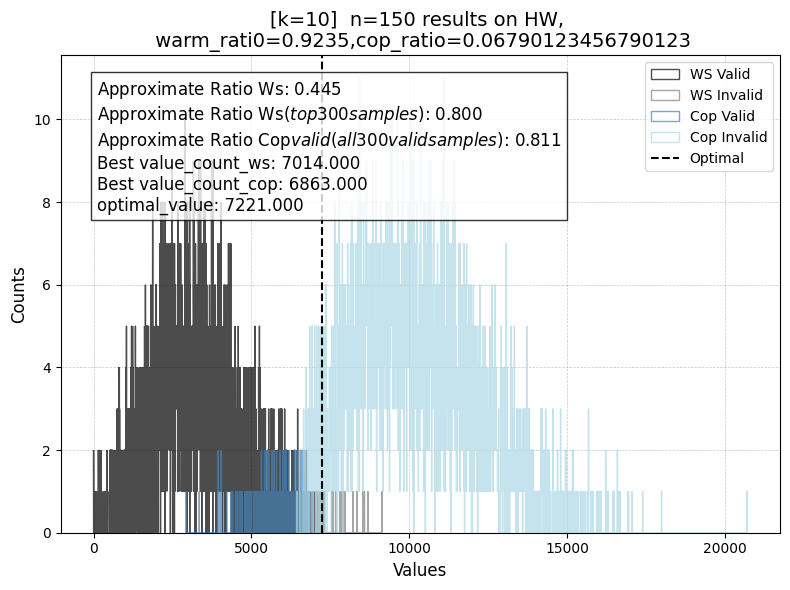

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': '[k=10]  n=150 results on HW, \n warm_rati0=0.9235,cop_ratio=0.06790123456790123'}, xlabel='Values', ylabel='Counts'>)

In [35]:
from scripts.utils.visualize import plot_multiple_distributions


data_dict = {
    f"Random Valid": [],
    f"Random Invalid": [],
    f"WS Valid": data_dict['WS Valid'],
    f"WS Invalid": data_dict['WS Invalid'],
    f"Cop Valid": data_dict['Cop Valid'],
    f"Cop Invalid": data_dict['Cop Invalid'],
}

colors = {}
for label in data_dict.keys():
    if "Valid" in label:
        if "Random" in label:
            colors[label] = "orange"
        elif "WS" in label:
            colors[label] = "black"
        elif "Cop" in label:
            colors[label] = "steelblue"
    else:  # Invalid
        if "Random" in label:
            colors[label] = "lightsalmon"
        elif "WS" in label:
            colors[label] = "gray"
        elif "Cop" in label:
            colors[label] = "lightblue"
# Custom colors
# colors = {
#     f"Random_valid: Apr={approx_ratio_random:.2f}": "orange",
#     f"Random_invalid: Apr={approx_ratio_random:.2f}": "lightsalmon",
#     f"WS_valid: Apr={approx_ratio_ws:.3f}": 'black',
#     f"WS_invalid: Apr={approx_ratio_ws:.3f}": 'gray',
#     f"Cop_valid p=1: Apr={approx_ratio:.3f}": "steelblue",
#     f"Cop_invalid p=1: Apr={approx_ratio:.3f}": "lightblue",
# }
# Annotations
annotations = {
    r"$\mathrm{Approximate\ Ratio\ Ws}$": annotations['$\mathrm{Approximate\ Ratio\ Ws}$'],
    r"$\mathrm{Approximate\ Ratio\ Ws}(top300samples)$":0.80025, 
    r"$\mathrm{Approximate\ Ratio\ Cop}valid( all 300 valid samples)$":  annotations['$\mathrm{Approximate\ Ratio\ Cop}$'],
    "Best value_count_ws": annotations['Best value_count_ws'],
    "Best value_count_cop": annotations['Best value_count_cop'],
    "optimal_value": annotations['optimal_value'],
}


plot_multiple_distributions(
    data_dict=data_dict,
    min_cost=annotations['optimal_value'],
    colors=colors,
    nb_bins=2000,
    log=False,
    annotations=annotations,
    figsize=(8, 6),
    title=f"[k={k}]  n={n} results on HW, \n warm_rati0={sum(data_dict['WS Valid'].values())/4000},cop_ratio={sum(data_dict['Cop Valid'].values())/shots}",
    )

